In [1]:
%matplotlib inline

import numpy as np
np.set_printoptions(precision=3, suppress=True)

In [87]:
class PCA:
    components = None
    eig_vecs, eig_vals = None, None
    def fit_transform(self, X, n_components=4):
        U, self.eig_vals, self.eig_vecs = np.linalg.svd(X)
        self.components = self.eig_vecs[:,:n_components]
        reduced_data = X @ self.components
        return reduced_data

# Wine Data

Load wine data

In [88]:
wine_data = np.genfromtxt('../Data/wine.data', delimiter=',', dtype=np.uint8)
X = wine_data[:, 1:]
y = wine_data[:, 0]
X = (X - X.mean(axis=0))

Transform data

In [89]:
pca = PCA()
X_red = pca.fit_transform(X)

In [90]:
import matplotlib.pyplot as plt

Principal Eigen Vector

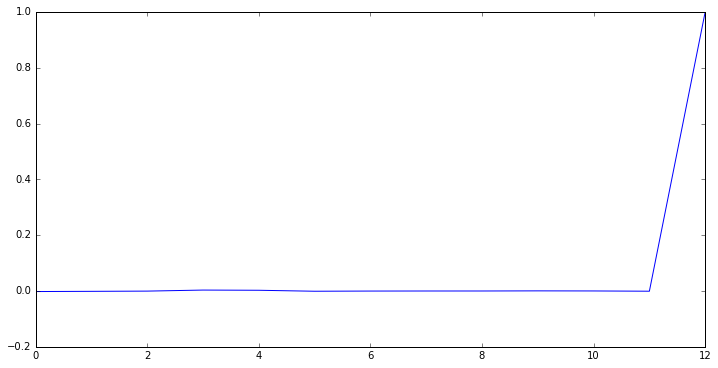

In [91]:
plt.plot(pca.eig_vecs[0])

Last Eigen Vector

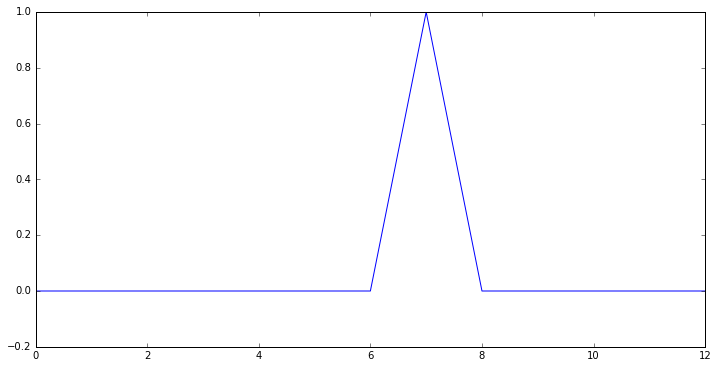

In [92]:
plt.plot(pca.eig_vecs[12])

Cumulative sum of Eigen Values

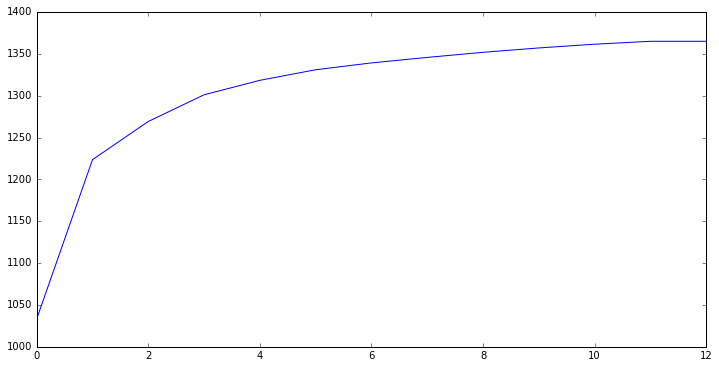

In [93]:
plt.plot(pca.eig_vals.cumsum())

As percentage

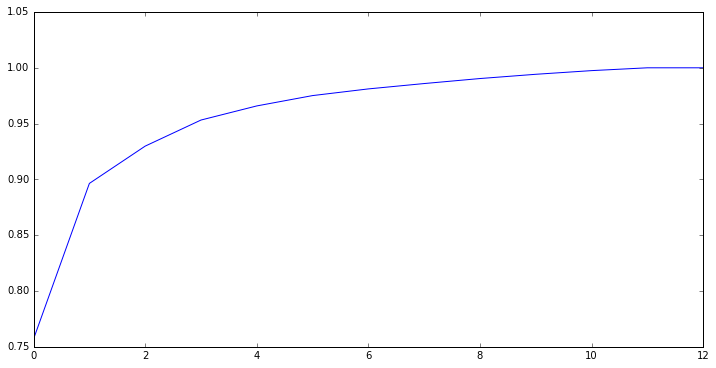

In [94]:
plt.plot(pca.eig_vals.cumsum()/pca.eig_vals.sum())

First three eigen_values correspond to more than 95% of the variance in information. 3 or 4 components are sufficient to hold information of the wine data

Reconstruction

In [104]:
X_rec = ((pca.eig_vecs[:4].T @ pca.eig_vecs[:4]) @ X.T).T
np.linalg.norm(X - X_rec)

25.77634173959229

# MNIST Data

Load MNIST Data

In [17]:
mnist_data = np.genfromtxt('../Data/MNIST_HW1/train.csv', delimiter=',', dtype=np.uint8)
mnist_data = mnist_data.T

Separate the data

In [105]:
X = mnist_data[:, :-1]
y = mnist_data[:, -1]

In [106]:
pca = PCA()
X_red = pca.fit_transform(X)

Cumulative Eigen Values:

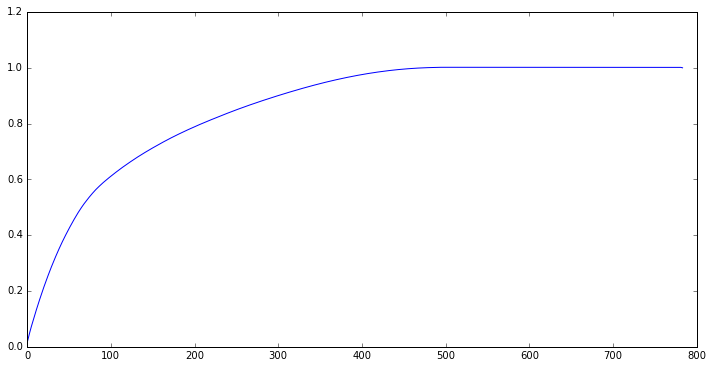

In [72]:
plt.plot(pca.eig_vals.cumsum()/pca.eig_vals.sum())

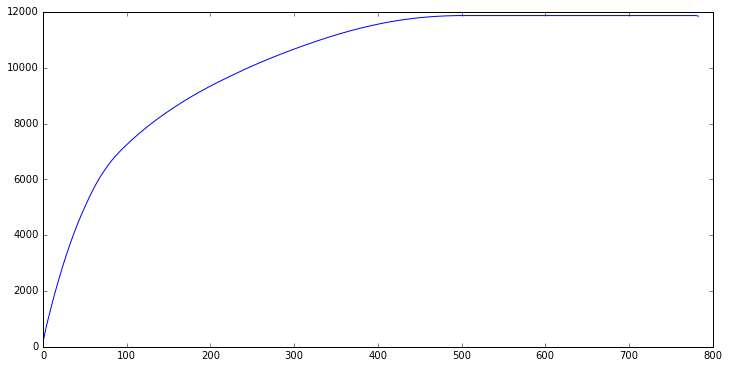

In [71]:
plt.plot(pca.eig_vals.cumsum())

Display Eigen Vectors

In [51]:
import scipy as sp
from scipy.misc import toimage, imresize

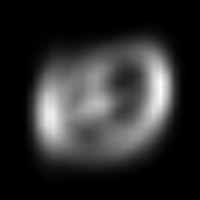

In [107]:
toimage(imresize(pca.eig_vecs[0].reshape(28, 28), size=(200, 200)))

First 400 Eigen Values contain almost all the data. Reduce the data to 400 dimensions.

In [108]:
pca = PCA()
X_red = pca.fit_transform(X, 400)

Reduced image

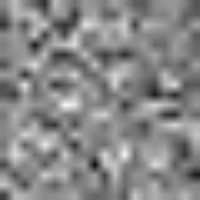

In [110]:
toimage(imresize(X_red[y==0].mean(axis=0).reshape(20, 20), size=(200, 200)))

Reconstruction error

In [111]:
X_rec = ((pca.eig_vecs[:4].T @ pca.eig_vecs[:4]) @ X.T).T
np.linalg.norm(X - X_rec)

312.03315840504746

Original Image:

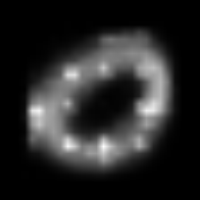

In [67]:
toimage(imresize(X[y==0].mean(axis=0).reshape(28,28), size=(200, 200)))

Reconstructed Image

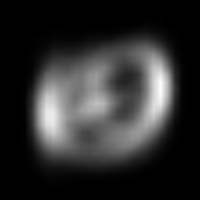

In [113]:
toimage(imresize(X_rec[y==0].mean(axis=0).reshape(28, 28), size=(200, 200)))